In [2]:
!git clone https://github.com/laxmimerit/Image-Dataset-for-Age-Prediction

Cloning into 'Image-Dataset-for-Age-Prediction'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 47107 (delta 0), reused 2 (delta 0), pack-reused 47104
Receiving objects: 100% (47107/47107), 1.37 GiB | 43.26 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (24110/24110), done.


In [3]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 143kB/s 
     |████████████████████████████████| 983kB 41.5MB/s 
     |████████████████████████████████| 266kB 49.3MB/s 
     |████████████████████████████████| 1.3MB 46.4MB/s 
     |████████████████████████████████| 1.1MB 42.5MB/s 
     |████████████████████████████████| 471kB 55.3MB/s 
     |████████████████████████████████| 2.9MB 42.4MB/s 
     |████████████████████████████████| 890kB 48.0MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.2-cp36-none-any.whl size=25276306 sha256=ee34c742ac104fcc52bfbf1f03f28967cdda370899b7c051fe763232eae89fd8
  Stored in directory: /root/.cache/pip/wheels/fe/56/00/25444c352cc843e5c5daea0e9517a192878ae22c2c6b5f4573
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=53c0fbe082ca0db55fe21b8d840da8f2bcf335a392eeb3ff02ff82a62282e985
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
  Created wheel for syn

In [4]:
%matplotlib inline
import os
import ktrain
from ktrain import vision as vis

In [5]:
import re
pattern = r'([^/]+)_\d+_\d+_\d+.jpg$'

p = re.compile(pattern)
r = p.search('10_0_0_20170110221719390.jpg')
print(r.group(1))

10


In [6]:
DATADIR = '/content/Image-Dataset-for-Age-Prediction/images'

In [7]:
(train_data, test_data, preproc) = vis.images_from_fname(DATADIR, pattern = pattern, is_regression=True, random_state=42)

/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:718: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/39_1_20170116174525125.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:718: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/24_0_1_20170116220224657 .jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:718: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/61_1_20170109142408075.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.6/dist-packages/ktrain/vision/data.py:718: UserWarning: Could not extract target for /content/Image-Dataset-fo

Found 21690 validated image filenames.
Found 2411 validated image filenames.


/usr/local/lib/python3.6/dist-packages/ktrain/utils.py:680: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  warnings.warn('is_regression=True was supplied but targets are strings - casting to floats')
/usr/local/lib/python3.6/dist-packages/ktrain/utils.py:581: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  'If this is incorrect, change accordingly.')


In [8]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized)
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized)
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized)
wrn22: 22-layer Wide Residual Network (randomly initialized)
default_cnn: a default LeNet-like Convolutional Neural Network


In [9]:
model = vis.image_regression_model('pretrained_resnet50', train_data=train_data, val_data=test_data )

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94773248/94765736 [==============================] - 1s 0us/step
pretrained_resnet50 model created.


In [10]:
learner = ktrain.get_learner(model=model, train_data=train_data, val_data=test_data, batch_size=64)

In [11]:
#learning rate = 1e-4

In [12]:
learner.fit_onecycle(1e-4, 2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
339/339 [==============================] - 328s 967ms/step - loss: 384.8598 - mae: 14.5229 - val_loss: 189.3272 - val_mae: 10.4326
Epoch 2/2
339/339 [==============================] - 324s 955ms/step - loss: 175.5326 - mae: 10.1212 - val_loss: 163.8081 - val_mae: 9.7702


In [13]:
learner.freeze(15)
learner.fit_onecycle(1e-4, 2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
339/339 [==============================] - 375s 1s/step - loss: 109.3903 - mae: 7.8411 - val_loss: 246.6520 - val_mae: 11.9050
Epoch 2/2
339/339 [==============================] - 374s 1s/step - loss: 46.2360 - mae: 5.1212 - val_loss: 63.6538 - val_mae: 5.8373


In [14]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [15]:
test_data.filenames[10:20]

['8_1_0_20170117175943380.jpg',
 '35_0_0_20170117134947221.jpg',
 '25_0_1_20170116003152620.jpg',
 '1_1_2_20161219141954401.jpg',
 '23_0_2_20170116172912257.jpg',
 '1_0_3_20161220223225003.jpg',
 '27_0_1_20170120133818199.jpg',
 '29_1_1_20170113001147795.jpg',
 '11_1_0_20170109203327397.jpg',
 '60_1_1_20170120221732551.jpg']

In [18]:
def show_prediction(fname):
  fname = DATADIR + '/' + fname
  pred = round(predictor.predict_filename(fname)[0])
  actual_age = int(p.search(fname).group(1))
  vis.show_image(fname)
  print("Predicted age: %s | Actual age: %s" % (pred, actual_age))

Predicted age: 36.0 | Actual age: 35


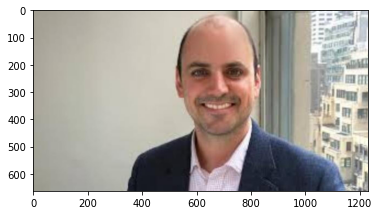

In [19]:
show_prediction('35_0_0_20170117134947221.jpg')

### Real Time

In [20]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


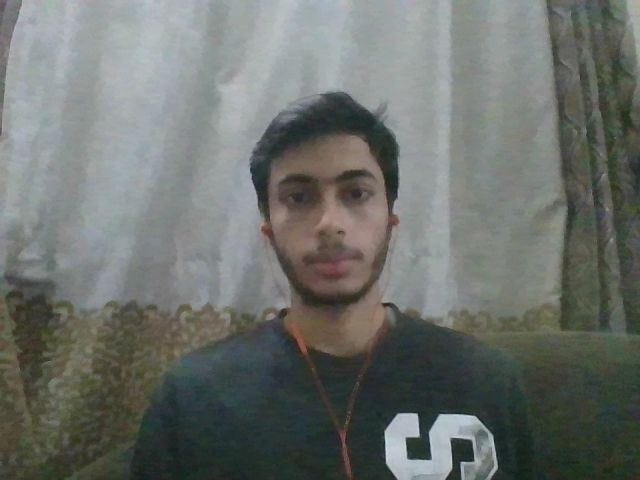

In [29]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [25]:
def real_prediction(fname):
  pred = round(predictor.predict_filename(fname)[0])
  vis.show_image(fname)
  print("Predicted age: %s" % (pred))

Predicted age: 22.0


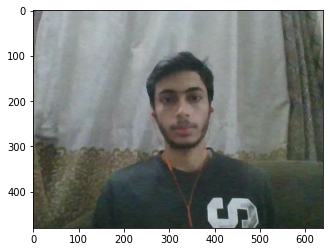

In [30]:
real_prediction('photo.jpg')